## Asymmetric Laplace

How can the asymmetric Laplace distribution be represented as a scale-mixture of Normals?

Noting that normal has much lighter tails and asymmetric Laplace has exponential tails, consider an asymptotically exponential mixture over scales. Also noting that asymmetric Laplace has no cusp at zero, assume the scale mixture has a root of some order at zero.  A simple ansatz is the `Gamma(a,b)` family for some `a > 0`. Indeed `Gamma(6,4)` appears to be an ok fit.

In [1]:
import math
import matplotlib.pyplot as plt
import torch
import pyro.distributions as dist

In [2]:
d1 = dist.SoftLaplace(0, 1).log_prob

In [3]:
def d2(x, num_samples=1000000):
    s = dist.Gamma(6, 4).sample((num_samples,) + (1,) * x.dim())
    return dist.Normal(0, s).log_prob(x).logsumexp(0) - math.log(num_samples)

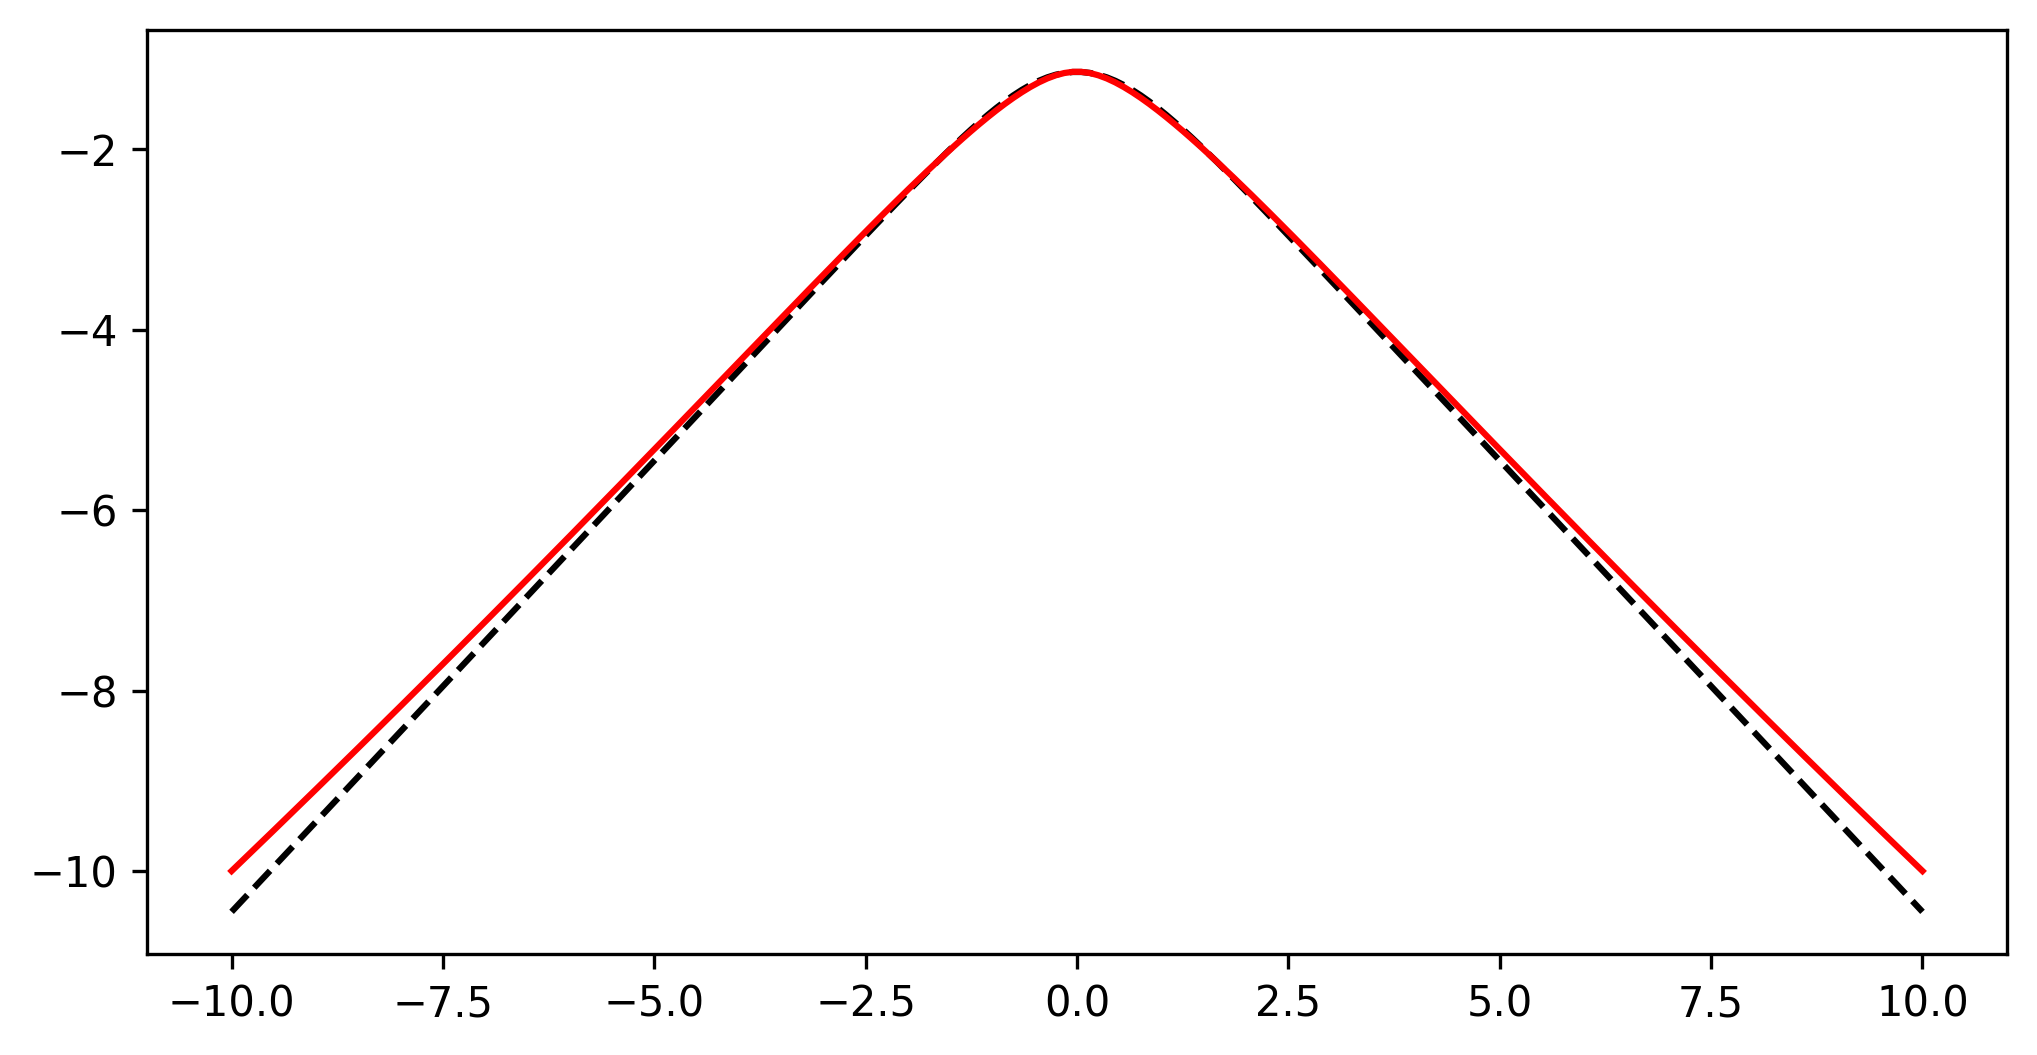

In [4]:
x = torch.linspace(-10, 10, 200)
plt.figure(figsize=(8,4), dpi=300)
plt.plot(x, d1(x), "k--")
plt.plot(x, d2(x), "r-");

## Soft Asymmetric Laplace distribution

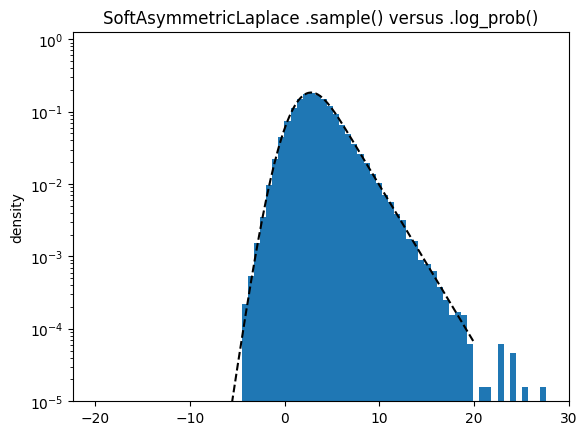

In [5]:
d = dist.SoftAsymmetricLaplace(2, 1, 0.5, 1.5)
samples = d.sample([100000])
x = torch.linspace(-20, 20, 200)
plt.hist(samples.numpy(), bins=50, density=True)
plt.plot(x, d.log_prob(x).exp(), "k--")
plt.ylabel("density")
plt.yscale("log")
plt.ylim(1e-5, None)
plt.title("SoftAsymmetricLaplace .sample() versus .log_prob()");